## Preprocessing

Preprocessing is a crucial step in creating a machine learning model as it involves preparing and cleaning the data to ensure that it is suitable for training. The specific preprocessing steps can vary depending on the type of data and the nature of the problem, but some common steps include: : handling of missing values, making sure that the values are in the correct format, and normalization of variables.

The preprocessing phase of our project drew significant inspiration from the data set creator's preprocessing procedures, as exemplified in the Kaggle dataset we utilized. This was done in order to ensure that the dataset was properly fit to be used by a machine learning model.

Firstly all the necessary libraries were imported. Without these libraries the code would not run.

In [75]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from sklearn.model_selection import train_test_split

import string
import warnings
warnings.filterwarnings("ignore")

The following code is a defensive approach to reading a CSV file. It checks if the file exists before attempting to read it. If the file exists, it loads the data into a Pandas DataFrame (df), and if not, it prints a message indicating that the file does not exist. Finally, it displays the head of the DataFrame for a quick preview of the data. The file data.csv (from the chosen kaggle dataset) must be uploaded into the notebook's files in order for this command to work.

In [76]:
file_path = r"/content/data.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"The file at {file_path} does not exist.")

df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


The following code removes the 'Count' and 'Probability' columns from the DataFrame in place. The removal of these columns is explained as a potential simplification of the data or removal of irrelevant information, which can be beneficial for certain analysis or modeling tasks.

In [77]:
# Removing specific columns ('Count' and 'Probability') from the DataFrame to potentially simplify the data or remove irrelevant information.
df.drop(columns = ['Count', 'Probability'], inplace = True)
df.head()

,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M


The following steps are done in order to clean the data; removing incorrect or unwanted data. Cleaning the data is important as it ensures that the data being used is accurate, reliable and suitable for the intended modeling task.

The overall purpose of this code is to identify and handle duplicate names in the dataset. It marks ambiguous names, removes duplicates based on both 'Name' and 'Gender', sorts the DataFrame, and then rechecks for duplicate names to confirm the success of the preprocessing steps.

In [78]:
# Check for duplicate names
if len(df['Name'].unique()) != len(df):
    # Calculate and display the count of duplicate names
    num_duplicates = len(df) - len(df['Name'].unique())
    print(f"Number of duplicate names: {num_duplicates}")

    # Identify and mark ambiguous names
    ambiguous_names_mask = df['Name'].duplicated(keep=False)
    df['Gender'].loc[ambiguous_names_mask] = 'N'

    # Remove duplicates based on both 'Name' and 'Gender'
    df.drop_duplicates(subset=['Name', 'Gender'], inplace=True)

    # Display the first few rows of the modified DataFrame
    print("First few rows after preprocessing:")
    print(df.head())

    # Display unique values in the 'Gender' column
    unique_genders = df['Gender'].unique()
    print(f"Unique genders after preprocessing: {unique_genders}")

    # Sort the DataFrame by the 'Name' column
    df.sort_values(by="Name", inplace=True)

    # Check again if there are any duplicate names after preprocessing
    if len(df) == len(df["Name"].unique()):
        print("No duplicate names after preprocessing.")
    else:
        print("Duplicate names still present after preprocessing.")
else:
    print("No duplicate names in the original dataset.")

Number of duplicate names: 13359
First few rows after preprocessing:
      Name Gender
0    James      N
1     John      N
2   Robert      N
3  Michael      N
4  William      N
Unique genders after preprocessing: ['N' 'F' 'M']
No duplicate names after preprocessing.


In [79]:
# Just making this easier to view sorting
df.sort_values(by = "Name", inplace = True)

In [80]:
# Let's check the dataframe again
df.head()

,Name,Gender
112246,A,N
115618,A'Aff,F
133954,A'Aron,M
115619,A'Dele,F
115620,A'Isha,F


The purpose of this code is to identify and display unique non-alphabetic characters present in the specified columns ('Name' in this case). This can be useful for data exploration and understanding the diversity of characters within the specified columns. The set 'characters_unique' will contain all unique non-alphabetic characters found in the specified columns of the DataFrame.

In [81]:
# Specify columns to check for unique characters
columns_to_check = ['Name']

# Find unique characters
characters_unique = set(letter for col in columns_to_check for value in df[col] for letter in value if letter not in string.ascii_letters)

# Display the unique characters
print("Unique characters in the specified columns:")
print(characters_unique)

Unique characters in the specified columns:
{'1', '0', '.', '@', ';', 'à', '"', '/', ',', '[', '8', '&', '7', '?', '…', '¡', '(', ')', "'", '9', 'œ', 'ö', '5', '-'}


The purpose of this code is to identify and display names in the 'Name' column that contain characters not found in the set of unique characters identified earlier. This can be useful for identifying and handling names with unexpected or potentially problematic characters in the dataset.

In [82]:
# Find names with unexpected characters
diff_names = [value for value in df['Name'] if any(letter in characters_unique for letter in value)]

# Display names with unexpected characters
print("Names with unexpected characters:")
print(diff_names)

Names with unexpected characters:
["A'Aff", "A'Aron", "A'Dele", "A'Isha", "A'Ishah", "A'Jana", "A'Janae", "A'Lmos", "A'Nette", 'A-Jay', 'A.', 'A.J.', 'Aahlia-Clare', "Aale'Yah", 'Aali-Tae', 'Aaliyah-Jade', 'Aaliyah-Jane', 'Aaliyah-Marie', 'Aaliyah-Rose', 'Aaliyaha-Rubie', 'Aaranah-Hope', 'Aaria-Jutta', 'Aaron-David', 'Aaron-James', 'Aaron-Kane', 'Aaron-Lee', 'Aaron-William', 'Aarron-Lee', 'Aayden-Onix', 'Abbee-Nicole', 'Abbey-Glen', 'Abbey-Jean', 'Abbey-Kate', 'Abbey-Lee', 'Abbey-Leigh', 'Abbey-Louise', 'Abbey-Lyn', 'Abbey-Mae', 'Abbey-Rose', 'Abbie-Jayne', 'Abbie-Louise', 'Abbie-Roze', 'Abby-Jade', 'Abby-Jane', 'Abby-Lea', 'Abby-Lee', 'Abby-May', 'Abby-Rose', 'Abd-Ulrahman', 'Abdel-Wahab', 'Abdi-Jabaar', 'Abdul-Halim', 'Abdul-Jalil', 'Abdul-Karim', 'Abdul-Malik', 'Abdul-Nasser', 'Abdul-Rahman', 'Abdul-Sattar', 'Abdul-Sumad', 'Abdullah-Jamiil', 'Abed-Kader', 'Abel-Biranibwebwe', 'Abel-Jay', 'Abey-Lee', 'Abi-Gail', 'Abi-Rose', 'Abraham-Tiima', 'Abrie-May', 'Abu-Bakar', 'Abu-Bakari', 'Ac

The purpose of this code is to identify and display names in the 'Name' column that contain the character ". This can be useful for identifying and handling names with specific characters of interest in the dataset. In this case, it specifically looks for names that include the double-quote character.

In [83]:
# Find names with the character "
diff_names = [value for value in df['Name'] if '"' in value]

# Display names with the character "
print("Names with the character \":")
print(diff_names)

Names with the character ":
['Baby""']


The purpose of this code is the same as the previous code, however this time the code looks for names that include the character "&".

In [84]:
# Find names with the character "&"
diff_names = [value for value in df['Name'] if '&' in value]

# Display names with the character "&"
print("Names with the character &:")
print(diff_names)

Names with the character &:
['Puspa&']


The purpose of this code is the same as the previous code, however this time the code looks for names that include the character "(".

In [85]:
# Find names with the character "("
diff_names = [value for value in df['Name'] if '(' in value]

# Display names with the character "("
print("Names with the character (:")
print(diff_names)

Names with the character (:
['Rachna(With', 'Sadab(Khura)']


This code is addressing a specific issue in the 'Name' column of the DataFrame (df). It appears that there are entries with names like "Rachna(With" and "Sadab(Khura)," and a normal cleaning function might not handle these cases correctly. The code aims to replace these specific entries with cleaner and more standardized names. This issue was raised by the data set's creator.

In [86]:
# ['Rachna(With', 'Sadab(Khura)'], Normal cleaning function cannot deal with this
df['Name'] = df['Name'].replace([diff_names[0]], 'Rachna')
df['Name'] = df['Name'].replace([diff_names[1]], 'Sadab Khura')

The purpose of this code is to identify and display names in the 'Name' column that contain the character ")".

In [87]:
# Find names with the character ")"
diff_names = [value for value in df['Name'] if ')' in value]

# Display names with the character ")"
print("Names with the character ):")
print(diff_names)

Names with the character ):
[]


The purpose of this code is the same as the previous code, however this time the code looks for names that include the character ",".

In [88]:
# Find names with the character ","
diff_names = [value for value in df['Name'] if ',' in value]

# Display names with the character ","
print("Names with the character ,:")
print(diff_names)

Names with the character ,:
['Addamo,', 'Edward,', 'Jianni,', 'Raju,', 'Ring,Deng', 'Savita,', 'Shakuntala@Pooja,', 'Smt,', 'Soniya,']


The purpose of this code is the same as the previous code, however this time the code looks for names that include the character "/".

In [89]:
# Find names with the character "/"
diff_names = [value for value in df['Name'] if '/' in value]

# Display names with the character "/"
print("Names with the character /:")
print(diff_names)

Names with the character /:
['Kismat/', 'Pooja/Varsha', 'Rina/', 'S/O', 'Shakuntla/Baby', 'W/O']


This code snippet removes rows from the DataFrame ('df') where the 'Name' column contains specific values, specifically "S/O" (Son of) and "W/O" (Wife of). The purpose of this code is to clean the 'Name' column by removing rows where the names include specific prefixes ('S/O' or 'W/O'). This type of cleaning is often necessary when dealing with naming conventions that include titles or relationship indicators.

In [90]:
# Remove "S/O" and "W/O" from the DataFrame
for ele in ['S/O', 'W/O']:
    indices_to_remove = df[df["Name"] == ele].index
    df.drop(indices_to_remove, inplace=True)

# Display the DataFrame after removal
df.head()

,Name,Gender
112246,A,N
115618,A'Aff,F
133954,A'Aron,M
115619,A'Dele,F
115620,A'Isha,F


This code snippet is designed to find and display names in the 'Name' column of the DataFrame ('df') that contain specific numeric characters ('0', '1', '5', '7', '8', '9').

In [91]:
# Find names with the characters '0', '1', '5', '7', '8', '9'
numbers_to_remove = {'0', '1', '5', '7', '8', '9'}
diff_names = [value for value in df['Name'] if any(letter in numbers_to_remove for letter in value)]

# Display names with the characters '0', '1', '5', '7', '8', '9'
print("Names with the characters '0', '1', '5', '7', '8', '9':")
print(diff_names)

Names with the characters '0', '1', '5', '7', '8', '9':
['Al0K', 'Gs-1957975', 'Jo-J0', 'Km0', 'Moh0', 'Nich0Le', 'Shi8Vprakash']


This code snippet removes rows from the DataFrame (df) where the 'Name' column contains names with the specified invalid characters. The purpose of this code is to clean the 'Name' column by removing rows where the names contain specific invalid characters. This ensures that the names are consistent with the desired format or structure for analysis or modeling.
Note:

In [92]:
# Remove names with invalid characters
for ele in diff_names:
    indices_to_remove = df[df["Name"] == ele].index
    df.drop(indices_to_remove, inplace=True)

# Display the DataFrame after removal
df.head()

,Name,Gender
112246,A,N
115618,A'Aff,F
133954,A'Aron,M
115619,A'Dele,F
115620,A'Isha,F


The purpose of this code is find and display namse in the 'Name' column that contain these characters ";","?","[".

In [93]:
# Find names with the characters ';', '?', '['
characters_to_remove = {';', '?', '['}
diff_names = [value for value in df['Name'] if any(letter in characters_to_remove for letter in value)]

# Display names with the characters ';', '?', '['
print("Names with the characters ';', '?', '[':")
print(diff_names)

Names with the characters ';', '?', '[':
['D;Wayne', 'Danielle;', 'De?Anne', 'Desiree;', 'Ea;Monn', 'J;Ami', 'Jet;Aime', 'Nu;Man', 'Rene?', 'Sandee[', 'Sher?Ee', 'Tha;Is']


The same is done with the following code.

In [94]:
# Find names with the characters '¡', 'à', 'ö', 'œ', '…'
characters_to_remove = {'¡', 'à', 'ö', 'œ', '…'}
diff_names = [value for value in df['Name'] if any(letter in characters_to_remove for letter in value)]

# Display names with the characters '¡', 'à', 'ö', 'œ', '…'
print("Names with the characters '¡', 'à', 'ö', 'œ', '…':")
print(diff_names)

Names with the characters '¡', 'à', 'ö', 'œ', '…':
['Am…Lie', 'Anaœs', 'Andr…', 'Chloà', 'Chlo…', 'Dant…', 'Esm…', 'F…Lix', 'Jos…', 'Loœc', 'L…O', 'Mat…O', 'Maàlle', 'Miloö', 'Oce¡', 'Ren…E', 'S…Bastien', 'T…A', 'Zoà', 'Zo…']


Remove these unwanted values from the dataset.

In [95]:
# Remove names with specific characters
for ele in diff_names:
    indices_to_remove = df[df["Name"] == ele].index
    df.drop(indices_to_remove, inplace=True)

# Display the DataFrame after removal
df.head()

,Name,Gender
112246,A,N
115618,A'Aff,F
133954,A'Aron,M
115619,A'Dele,F
115620,A'Isha,F


This code snippet is rechecking and updating the set of unique characters within the specified column ('Name') of the DataFrame ('df'). The purpose of this code is to update and display the set of unique characters within the specified column ('Name') after the cleaning steps have been applied. It allows for a quick check to see if the previous cleaning operations have successfully addressed and removed specific characters of interest.

In [96]:
# Rechecking unique characters
characters_unique = {letter for col in ['Name'] for value in df[col] for letter in value if letter not in string.ascii_letters}

# Display the unique characters
print("Unique characters in the specified columns:")
print(characters_unique)

Unique characters in the specified columns:
{'@', ';', '?', "'", '"', '/', ',', '[', '.', ' ', '-', '&'}


This code snippet performs two operations on the 'Name' column of the DataFrame ('df'): replacing the identified unique characters with a space, and converting names to lowercase. The purpose of these operations is to further clean and standardize the 'Name' column by removing specific characters and ensuring consistent lowercase formatting. This can enhance the dataset's uniformity and improve the reliability of subsequent analyses or modeling tasks.

In [97]:
# All these characters are going to be replaced with a space.
# Make all the names to lower case.
df['Name'] = df['Name'].str.lower()

In [98]:
def clean(word):
    # Unwanted characters changed to space
    for extra in ['"', '&', ',', '-', '.', '/', ';', '?', '@', '[']:
        word = word.replace(extra, ' ')

    # Like a'aron -> aaron
    word = word.replace("'", "")

    # Extra spaces are stripped
    return word.strip()

Implement the operations.

In [99]:
df['Name'] = df['Name'].apply(clean)

Check if it was implemented correctly.

In [100]:
df.head()

,Name,Gender
112246,a,N
115618,aaff,F
133954,aaron,M
115619,adele,F
115620,aisha,F


This code snippet is rechecking and updating the set of unique characters within the specified column ('Name') of the DataFrame ('df'). It also includes the space character in the set of unique characters. The purpose of this code is to update and display the set of unique characters within the specified column ('Name') after the cleaning and transformation operations have been applied. Including space in the set is important as space might have been added during the cleaning process.

In [101]:
# Rechecking unique characters
characters_unique = {letter for col in ['Name'] for value in df[col] for letter in value if letter not in string.ascii_lowercase}

# Including space in unique characters
characters_unique.add(' ')

# Display the unique characters
print("Unique characters in the specified columns:")
print(characters_unique)

Unique characters in the specified columns:
{' '}


This code snippet aims to find the longest name in the 'Name' column of the DataFrame ('df'). This was done in order to normalize the data set.

In [102]:
# Find the longest name
max_length = 0
longest_name = ""

for value in df['Name']:
    length = len(value)
    if length > max_length:
        max_length = length
        longest_name = value

# Display the longest name
print("Longest name:", longest_name)

Longest name: carmelo antonio francesco


In [103]:
# Just to see max length
max_length

25

The provided code defines a padding function, 'padding(word)', which takes a word as input and pads it with spaces to achieve a specified length defined by the constant 'PAD'. As mentioned previously this was done in order to normalize the data set.

In [104]:
PAD = 25

# Padding function
def padding(word):
    length = len(word)
    pad_width = " " * (PAD - length)
    return word + pad_width

Test if the previous code worked.

In [105]:
test_name = padding("aaron")
test_name

'aaron                    '

In [106]:
# Testing
len(test_name)

25

Since it worked, apply this to the entire data set.

In [107]:
df['Name'] = df['Name'].apply(padding)

In [108]:
# Checking
df.head()

,Name,Gender
112246,a,N
115618,aaff,F
133954,aaron,M
115619,adele,F
115620,aisha,F


The provided code defines a function named 'split_name(name)' that takes a string ('name') as input and returns a pandas Series where each character of the input string is placed into a separate column. The purpose of this function is to facilitate the transformation of a string containing characters into a more tabular or structured format. By splitting each character into a separate column, it can be useful in certain data preprocessing or analysis tasks.

In [109]:
# Function to split each character of the 'Name' column into separate columns
def split_name(name):
    return pd.Series(list(name))

The provided code generates a list of new column names using a list comprehension. This was done to transform or extend the dataset, while adhering to a specific pattern of column names.

In [110]:
new_columns = ['n'+str(i) for i in range(1, 26)]
new_columns

['n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'n15',
 'n16',
 'n17',
 'n18',
 'n19',
 'n20',
 'n21',
 'n22',
 'n23',
 'n24',
 'n25']

Create the new columns in the data set.

In [111]:
# Apply the function to the 'Name' column and create new columns
df[new_columns] = df['Name'].apply(split_name)

In [112]:
df.head()

,Name,Gender,n1,n2,n3,n4,n5,n6,n7,n8,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
112246,a,N,a,,,,,,,,...,,,,,,,,,,
115618,aaff,F,a,a,f,f,,,,,...,,,,,,,,,,
133954,aaron,M,a,a,r,o,n,,,,...,,,,,,,,,,
115619,adele,F,a,d,e,l,e,,,,...,,,,,,,,,,
115620,aisha,F,a,i,s,h,a,,,,...,,,,,,,,,,


Save the changes to the file.

In [113]:
df.to_csv("data-clean.csv", index = False)

The next few steps are placed as a way to visualize the data. This was done to allow for better understanding of the chosen data set.

The provided code snippet is using the 'drop' method to remove the column named "Name" from a DataFrame ('df').

In [114]:
df.drop(columns = ["Name"], inplace = True)
df.head()

,Gender,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
112246,N,a,,,,,,,,,...,,,,,,,,,,
115618,F,a,a,f,f,,,,,,...,,,,,,,,,,
133954,M,a,a,r,o,n,,,,,...,,,,,,,,,,
115619,F,a,d,e,l,e,,,,,...,,,,,,,,,,
115620,F,a,i,s,h,a,,,,,...,,,,,,,,,,


The provided code is using the 'value_counts' method in combination with the 'plot' method to generate a bar plot of the counts of unique values in the "Gender" column of the DataFrame ('df').

<Axes: >

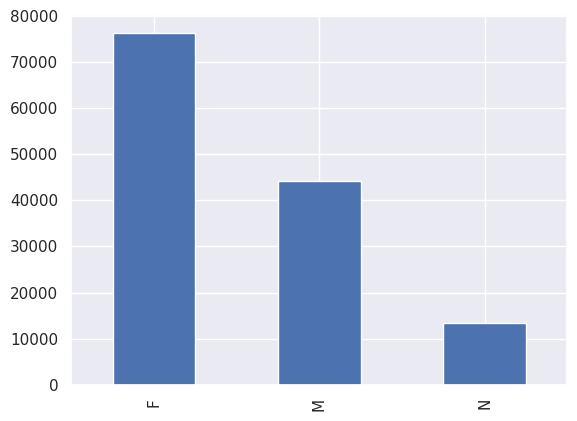

In [115]:
# Dangerous Value Counts
df['Gender'].value_counts().plot(kind = "bar")

In [116]:
df.describe()

,Gender,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
count,133881,133881,133881,133881,133881,133881,133881,133881,133881,133881,...,133881,133881,133881,133881,133881,133881,133881,133881,133881,133881
unique,3,26,27,27,27,27,27,27,27,27,...,22,23,18,18,14,13,9,6,4,2
top,F,a,a,r,a,a,,,,,...,,,,,,,,,,
freq,76376,13778,39719,15960,17050,19272,31278,65165,97126,115850,...,133605,133731,133786,133825,133844,133861,133870,133875,133878,133880


The provided code is using the value_counts method along with the plot method to generate a bar plot of the counts of unique values in the column "n1" (letters) of the DataFrame ('df').

<Axes: >

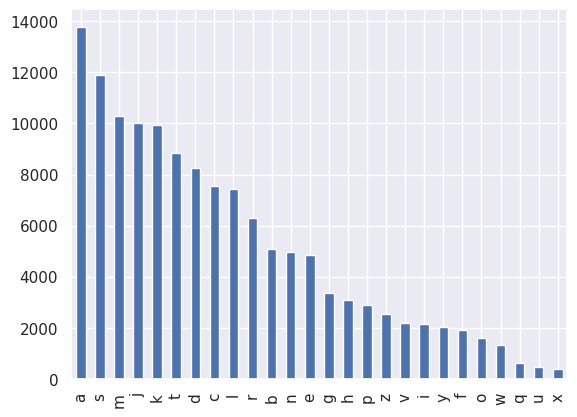

In [117]:
# Visualize letter distribution
df['n1'].value_counts().plot(kind = "bar")

The next few steps are done in order to encode the data. Data encoding refers to the process of representing data in a specific format, often converting it from one type or representation to another. In the context of machine learning and data analysis, encoding is frequently used to represent categorical data or text in a numerical format. This is done to ensure compatibility with algorithms, and to facilitate accurate and meaningful analysis.

The provided code creates a mapping of unique values in the "Gender" column of the DataFrame ('df') to their corresponding indices.

In [118]:
gender_unique = df['Gender'].unique()
gender_map = {gender: index for index, gender in enumerate(gender_unique)}
gender_map

{'N': 0, 'F': 1, 'M': 2}

The provided code creates a mapping of lowercase English alphabet characters along with a space to their corresponding indices.

In [119]:
character_unique = " " + string.ascii_lowercase
character_map = {char: index for index, char in enumerate(character_unique)}
character_map

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

The provided code is using the 'map' method to replace values in the "Gender" column of the DataFrame ('df') with their corresponding numerical indices as defined in the 'gender_map' dictionary.

In [120]:
df['Gender'] = df['Gender'].map(gender_map)
df.head()

,Gender,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
112246,0,a,,,,,,,,,...,,,,,,,,,,
115618,1,a,a,f,f,,,,,,...,,,,,,,,,,
133954,2,a,a,r,o,n,,,,,...,,,,,,,,,,
115619,1,a,d,e,l,e,,,,,...,,,,,,,,,,
115620,1,a,i,s,h,a,,,,,...,,,,,,,,,,


The provided code is mapping the characters in each column labeled 'n1' through 'n25' in the DataFrame ('df') using the 'character_map' dictionary.

In [121]:
n_columns = [f'n{i}' for i in range(1, 26)]

# Map the characters in each 'n' column using the character_map
df[n_columns] = df[n_columns].applymap(lambda value: character_map[value])

# Display the DataFrame after mapping
df.head()

,Gender,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
112246,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115618,1,1,1,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133954,2,1,1,18,15,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115619,1,1,4,5,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115620,1,1,9,19,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The provided code generates a correlation matrix for the DataFrame ('df') and creates a heatmap visualization using the Seaborn library.The colors in the heatmap indicate the strength and direction of the correlation: positive correlations are represented by lighter colors, while negative correlations are represented by darker colors.

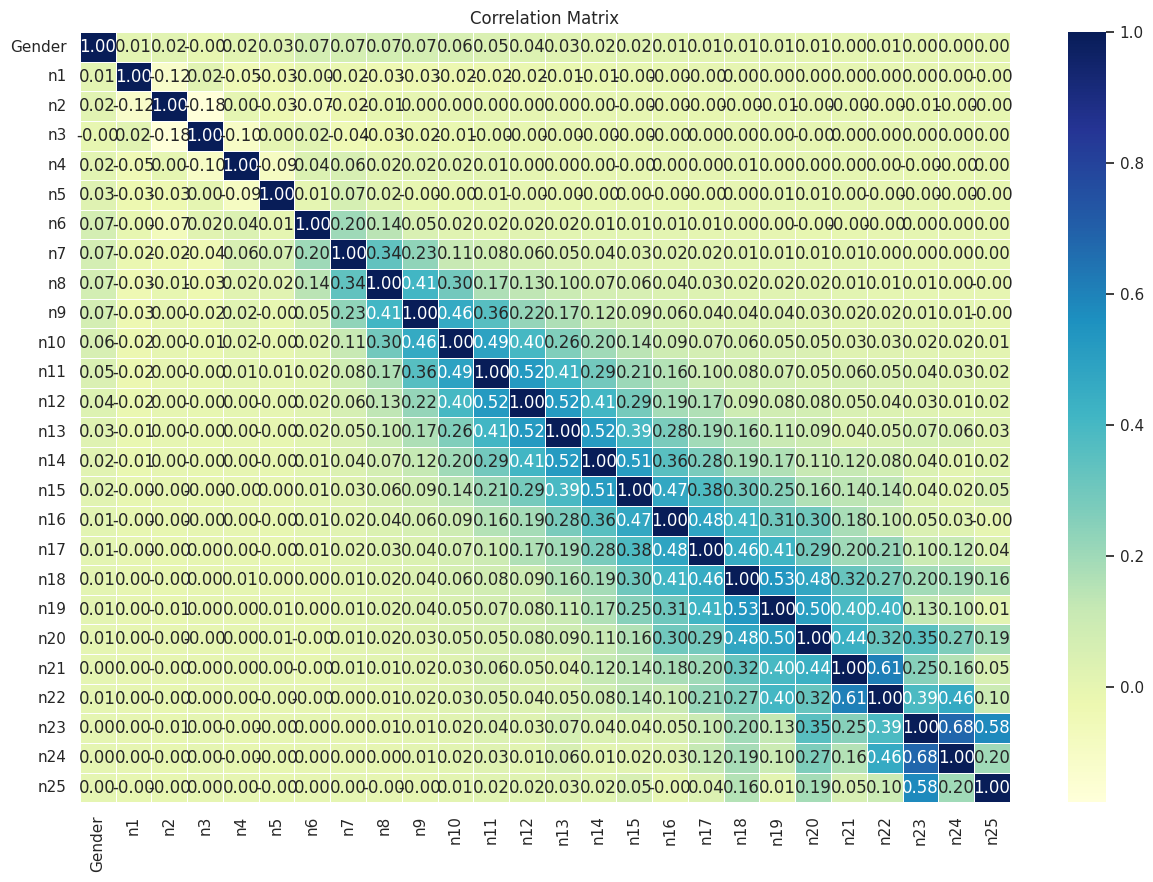

In [122]:
corr_matrix = df.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      linewidths=0.5,
                      fmt=".2f",
                      cmap="YlGnBu")

# Customize the appearance if needed
ax.set_title("Correlation Matrix")
plt.show()

Save the current file.

In [123]:
df.to_csv("data-encoded.csv", index = False)

The following steps are done in order to prepare the data set to be used by machine learning models.

As the group wants to focus on only male and female names the neutral column was dropped.

In [124]:
# Drop rows with 'neutral' (label 0) and keep only 'male' (label 2) and 'female' (label 1)
df_filtered = df[df['Gender'].isin([1, 2])]

The labels for male and female (previously 2 and 1 respectively) were swapped to 'M' and 'F' to make it easier to understand.

In [125]:
# Map labels to 'M' and 'F'
label_mapping = {1: 'F', 2: 'M'}
df_filtered['Gender'] = df_filtered['Gender'].map(label_mapping)

The provided code is splitting the DataFrame 'df' into feature variables ('X') and the target variable ('y') for a machine learning task.

In [126]:
# Separate features and target variable
X = df_filtered.drop("Gender", axis=1)
y = df_filtered['Gender']

View the values in X.

In [127]:
X.head()

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,...,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25
115618,1,1,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133954,1,1,18,15,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115619,1,4,5,12,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115620,1,9,19,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115621,1,9,19,8,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


View the values in y.

In [128]:
y.head()

115618    F
133954    M
115619    F
115620    F
115621    F
Name: Gender, dtype: object

The provided code is performing a train-test split on the feature variables ('X') and the target variable ('y'). This is a common step in machine learning to create separate datasets for training and testing a model. The purpose of the train-test split is to assess how well the model generalizes to new, unseen data. By evaluating the model on a separate test set, one can get an estimate of its performance on data it hasn't seen during training.

The provided code snippet follows standard practices in machine learning evaluation by utilizing the train_test_split function to set up training and testing data. The main objective is to divide the dataset into separate training and testing subsets. This division allows the model to be trained on one portion of the data while evaluating its performance on another unseen portion. The test_size parameter is set to 0.2, allocating 20% of the data for testing and 80% for training. This ratio strikes a balance between having a sufficiently large training set for effective model training and reserving a separate test set for robust evaluation. The random_state parameter is included with a value of 42 to ensure consistency in the data split across different code executions, enhancing reproducibility.

In [129]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The provided code is saving the training and testing sets of feature variables ('X_train' and 'X_test') along with the corresponding target variables ('y_train' and 'y_test') to separate CSV (Comma-Separated Values) files. Saving the datasets to CSV files allows for easy storage and sharing of the data.

In [130]:
# Save the filtered datasets
X_train.to_csv("x-train.csv", index=False)
X_test.to_csv("x-test.csv", index=False)
y_train.to_csv("y-train.csv", index=False)
y_test.to_csv("y-test.csv", index=False)

# Definition of Classification Task

**Task Overview**

Our machine learning task focuses on accurately classifying the gender associated with a given name. Our goal is to create a model that can effectively predict whether a given name belongs to a male or female individual.

**Rationale for Choosing this Classification Task**

The classification of gender through names holds significant societal and cultural implications. Names frequently encompass underlying cultural, historical, or familial associations that are tied to gender expectations. Through the automation of this categorization process, our objective is to delve into and comprehend the biases and stereotypes ingrained in names within diverse cultures and regions.

Names showcase a wide range of differences that are shaped by multiple elements, including geography, ethnicity, and language. This categorization endeavor offers a chance to delve into and acknowledge the abundance of names, transforming it into not just an intriguing machine learning challenge but also a way to foster cultural consciousness.

The accurate classification of gender based on names has practical applications in various fields, including but not limited to:


1.   Personalization: Companies can use gender predictions to tailor their products and services to specific demographic groups.
2.   Demographic Studies: Sociologists and demographers can leverage this classification to analyze trends and patterns related to naming conventions in different populations.

We acknowledge the ethical dilemmas that may arise from predicting gender based on names. As names do not always correspond with an individual's gender identity, despite this we believe that tackling this issue would detract from the classification task we want to implement. As such it was decided that we would not tackled this issue in our implemented machine learning models.

Our team is fascinated by the captivating realm of name classification through machine learning. Although developing the model itself is not overly difficult, the true allure lies in delving into the intricacies of text data, experimenting with innovative feature engineering techniques, and carefully considering potential biases in our predictions. Unraveling the cultural and linguistic subtleties woven into names adds an additional layer of fascination to our ongoing journey.

In summary, the way we classify gender through names has significant cultural and societal implications, as it reflects underlying associations with gender expectations, culture, history, and family. Our goal with the automated categorization process is to explore and understand biases and stereotypes ingrained in names across diverse cultures. This not only presents a fascinating machine learning challenge but also promotes cultural awareness by recognizing the rich variety of names influenced by geography, ethnicity, and language. Despite the ethical concerns surrounding predicting gender based on names, our team is committed to navigating these complexities. While developing the model itself is not overly challenging, the true excitement lies in unraveling the intricacies of text data and experimenting with innovative feature engineering, adding an extra layer of intrigue to our ongoing journey

# Implementation and Evaluation of Classification Models

Download scikit-learn.

In [ ]:
# run only once per session!
!pip install scikit-learn

It is important to note that the creator who created the data set our group used also used scikit-learn.

**Ridge Classifier**

The Ridge Classifier is a linear classification model that incorporates Ridge Regression, a type of L2 regularization, as its underlying regularization technique. Unlike traditional linear classifiers like logistic regression, the Ridge Classifier aims to enhance the robustness of the model and reduce overfitting by introducing a regularization term into the standard linear regression loss function. Ridge Regression involves minimizing a combined loss function that includes the ordinary least squares (OLS) loss and an additional penalty term based on the sum of squared coefficients. In the context of classification, the Ridge Classifier utilizes this regularization mechanism to discourage the emergence of excessively large weights associated with each feature, thereby promoting a more stable and less sensitive linear decision boundary. During training, the model strives to strike a balance between effectively fitting the training data and avoiding the creation of overly complex models. This is particularly advantageous in scenarios involving high-dimensional data or situations where the number of features is comparable to or exceeds the number of samples. Overall, the Ridge Classifier is specifically designed to enhance the performance of generalization and mitigate the risks of overfitting in linear classification tasks.

Import the necessary libraries for the code to run.

In [132]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report

Use the previously split data sets in the machine learning model.

In [133]:
X_train = pd.read_csv("x-train.csv")
X_test = pd.read_csv("x-test.csv")
y_train = pd.read_csv("y-train.csv")
y_test = pd.read_csv("y-test.csv")

In the following code, the scikit-learn library is used to initialize a Ridge Classifier. The RidgeClassifier() represents an instance of the Ridge Classifier class, which is a linear classification model that incorporates Ridge Regression for regularization. The main objective of the Ridge Classifier is to find a balance between accurately fitting the training data and preventing overfitting by introducing a penalty term to the standard linear regression loss function. By default, the model is initialized with standard hyperparameters, but these can be adjusted according to the specific requirements of the task. Once the Ridge Classifier instance is initialized, it is ready to be trained on a dataset, where it learns the optimal weights for each feature while taking into account the regularization term. This regularization helps control the complexity of the model and improves its ability to generalize well to new, unseen data. After training, the Ridge Classifier can be utilized to make predictions on new data points, providing a linear decision boundary to classify instances into different classes.

In [134]:
ridge_classifier = RidgeClassifier()

In the provided code, the fit method is utilized to train the Ridge Classifier model that was previously initialized. This training process involves using the training data (X_train and y_train) to teach the model the underlying patterns and relationships within the dataset. By minimizing the combined loss function, which includes the standard linear classification loss and the Ridge regularization term, the Ridge Classifier optimizes its internal parameters, specifically the coefficients assigned to each feature. The training data, represented by X_train, consists of the features, while y_train represents the corresponding labels or target values. Through an iterative optimization algorithm, the model adjusts its parameters in order to find the optimal set of weights that accurately describe the relationships between the features and target labels. As a result of this fitting process, a trained Ridge Classifier is obtained, which can then be used to make predictions on new, unseen data based on the patterns learned during training. It is important to acknowledge that the effectiveness of the model relies on various factors, including the quality and representativeness of the training data, as well as the appropriate tuning of hyperparameters.

In [135]:
ridge_classifier.fit(X_train, y_train)

RidgeClassifier()

In this code, the test set is used to generate predictions using a Ridge Classifier model that has been previously trained. Once the Ridge Classifier has been trained on the training data, it obtains a set of coefficients that define a linear decision boundary. The predict() method is then applied to the feature vectors in the test set (X_test). This method utilizes the acquired coefficients to make predictions about the target labels for the instances in the test set.

The resulting y_pred variable contains the predicted labels for each corresponding instance in the test set. These predicted labels represent the classification decisions made by the Ridge Classifier based on the patterns it learned during the training phase. Afterwards, these predictions can be compared with the true labels in the test set (y_test) to assess the model's performance in terms of accuracy or other relevant metrics.

In [136]:
y_pred = ridge_classifier.predict(X_test)

This line evaluates the model by getting the accuracy.

In interpreting the results, standard evaluation metrics such as accuracy, precision, recall, or F1-score are employed to quantify the model's performance on the test set. This analysis serves to gauge the model's ability to generalize to new, unseen data and detect potential overfitting issues by comparing its performance on training versus testing data.

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 63.25%


This line displays a detailed report to better understand how the Ridge Classifier model performed.

In [138]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           F       0.63      1.00      0.77     15245
           M       0.55      0.00      0.00      8860

    accuracy                           0.63     24105
   macro avg       0.59      0.50      0.39     24105
weighted avg       0.60      0.63      0.49     24105



**Random Forest**

A Random Forest is a machine learning technique that combines multiple decision trees to achieve a more accurate and reliable outcome. Each decision tree in the Random Forest represents a flowchart-like structure, with nodes representing attribute tests, branches indicating test outcomes, and leaves representing class labels. The ensemble aspect of the Random Forest involves using random subsets of features at each split during tree construction, promoting diversity among the trees and preventing the dominance of any single feature. This technique, known as bootstrap aggregating or bagging, reduces overfitting and improves generalization by training multiple decision trees on different bootstrap samples of the training data. In classification tasks, the final prediction is determined by majority voting among the trees, while in regression tasks, it involves averaging the predictions. Random Forests are highly regarded for their robustness and ability to handle noisy data, making them widely used in machine learning for tasks such as classification and regression. They provide a practical solution to the challenges of overfitting and contribute to reliable predictions across various applications. Moreover, the Random Forest model can estimate its performance using out-of-bag samples, further enhancing its usefulness in different scenarios.

Import the necessary libraries to run the code.

In [139]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Use the previously split data set for training and testing the machine learning model.

In [140]:
X_train = pd.read_csv("x-train.csv")
X_test = pd.read_csv("x-test.csv")
y_train = pd.read_csv("y-train.csv")
y_test = pd.read_csv("y-test.csv")

A Random Forest classifier is initialized in Python using the scikit-learn library with the following line of code. The RandomForestClassifier class from the ensemble module is utilized for this purpose. The key parameter, n_estimators, is assigned a value of 100, which determines the number of decision trees that will be included in the Random Forest. This parameter is crucial as it can impact the performance of the model and may need to be optimized based on the specific dataset and problem at hand. Additionally, the random_state parameter is set to 42, serving as a random seed to ensure reproducibility. By fixing the random seed, the algorithm's initialization remains consistent across different runs, making it easier to reproduce results and assist in debugging. Essentially, this line of code establishes a Random Forest classifier with 100 decision trees, characterized by a controlled randomization process that ensures reliable and reproducible model training and predictions in subsequent stages of the code.

In [141]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

The fit method is used to train the Random Forest classifier on the provided training data in this line of code. The random_forest_model variable holds the configuration details set during initialization, such as the number of decision trees and the random seed. By adapting its internal parameters based on the patterns in the training data, the fit method allows the model to learn. The feature matrix X_train contains the input variables used by the model to identify patterns, while y_train.values.ravel() represents the target variable with labels or classes for classification. The .values.ravel() transformation ensures that the target variable is in the expected format for scikit-learn's classification tasks, presenting it as a flattened 1-dimensional array. After executing this line, the Random Forest model is trained and ready to make predictions on new, unseen data using the learned patterns from the training set.




In [142]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In this line of code, the test data is used to generate predictions using the Random Forest model that was previously trained. The variable random_forest_model represents an instance of the Random Forest classifier, which was configured and adapted during the training phase using the training data. The predict method is then used to apply the learned patterns from the training data to the test data. The input variables for the model to make predictions on are contained in the feature matrix of the test data, denoted as X_test. The resulting predictions are stored in the variable y_pred. These predictions reflect the model's understanding of the relationships and patterns learned from the training set, and they can be used to evaluate the model's performance on unseen data. This evaluation step is crucial for assessing the Random Forest model's ability to generalize its learned knowledge to new examples and make accurate predictions in real-world scenarios.

In [143]:
y_pred = random_forest_model.predict(X_test)

How well the Random Forest model did in this classification Task is determined by the accuracy outputted by the code below.

In [144]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 87.48%


This line displays a detailed report to better understand how the Random Forest model performed.

In [145]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           F       0.89      0.91      0.90     15245
           M       0.84      0.81      0.83      8860

    accuracy                           0.87     24105
   macro avg       0.87      0.86      0.86     24105
weighted avg       0.87      0.87      0.87     24105



**Evaluation of implemented Machine Learning Models**

The performance characteristics of the Ridge classification model and the Random Forest model differ significantly. The Ridge model demonstrates a precision of 0.63 for class F, indicating a 63% accuracy in predicting instances of this class. However, its precision for class M is lower at 0.55. It is worth noting that the recall for class F is high at 1.00, capturing all instances, while the recall for class M is extremely low at 0.00, indicating a failure to identify most instances of class M. The F1-score for class F is 0.77, representing a reasonable balance between precision and recall. On the other hand, the F1-score for class M is 0.00, indicating poor performance. The overall accuracy of the Ridge model is 0.63.

On the positive side, Ridge regression, which utilizes L2 regularization, has several benefits. Firstly, it aids in feature selection by penalizing large coefficients, preventing overfitting and promoting better generalization. Secondly, Ridge regression is effective in handling multicollinearity, making it ideal for datasets with correlated predictor variables. Additionally, the model's interpretability is noteworthy, as it simplifies the understanding of the impact and direction of each feature through its associated coefficients. Furthermore, Ridge regression is stable in scenarios with high-dimensional datasets or when the number of features approaches or surpasses the number of observations.

However, there are notable drawbacks to using the Ridge classification model. Firstly, it relies on the assumption of linearity between features and the target variable, making it less effective in capturing complex non-linear relationships. Secondly, Ridge regression may still be sensitive to outliers, impacting its performance despite its ability to handle multicollinearity. Thirdly, its expressiveness is limited compared to more flexible models like decision trees or neural networks, especially in situations with highly non-linear decision boundaries. Lastly, Ridge regression requires careful tuning of the regularization strength (alpha), and the model's performance can be sensitive to this hyperparameter. In summary, while Ridge regression offers advantages in regularization and interpretability, its suitability depends on the specific characteristics of the dataset, and consideration of its limitations is crucial for optimal performance.

In contrast, the Random Forest model exhibits higher precision for both classes, with 0.89 for class F and 0.84 for class M. The recall for both classes is also favorable, with 0.91 for class F and 0.81 for class M. Consequently, the F1-scores for both classes are higher, with 0.90 for F and 0.83 for M, indicating a more balanced performance. The overall accuracy of the Random Forest model is 0.87, surpassing the Ridge model. This suggests that the Random Forest model provides a more accurate and balanced classification across the classes.

The Random Forest model, which falls under the category of ensemble learning, offers a variety of advantages and disadvantages in machine learning applications. On the positive side, Random Forests are well-known for their high accuracy, achieved by combining predictions from multiple decision trees. This ensemble approach helps prevent overfitting and improves the ability to generalize to new, unseen data. The model also provides valuable insights into the importance of features, which can assist in feature selection and interpretation. Random Forests are versatile and can effectively handle both regression and classification tasks, even in situations with complex relationships and a large number of features. Additionally, the model automatically handles missing values in the dataset without requiring imputation.

However, there are drawbacks to consider. Random Forests lack interpretability at the overall model level, as understanding the decision-making process of individual trees within the ensemble can be complex. The computational complexity of training and predicting with Random Forests is another factor to consider, especially when dealing with large datasets and a high number of trees in the ensemble. In classification tasks with imbalanced datasets, the model may exhibit bias towards dominant classes, requiring the use of class weighting or balancing techniques. Furthermore, Random Forests require significant memory usage, particularly when working with numerous trees and features. Lastly, their "black box" nature can present challenges, as the internal logic and decision-making process may be difficult to comprehend, especially when dealing with intricate feature interactions.

In conclusion, Random Forests are powerful and versatile models that are suitable for a wide range of datasets. However, users should be aware of factors such as interpretability, computational complexity, and handling imbalanced data when incorporating them into machine learning tasks.

**Similarities between Machine Learning Models**

The Ridge classification model and the Random Forest model, despite being different in nature, share some similarities:


1.   Both models integrate a type of regularization technique. The Ridge classification model utilizes L2 regularization, which penalizes significant coefficients to avoid overfitting. On the other hand, Random Forests employ the aggregation of numerous decision trees to address overfitting, serving as a regularization method.

2.  Ridge regression is renowned for its capability to address multicollinearity by penalizing significant coefficients linked to correlated features. In a similar vein, Random Forests can effectively tackle multicollinearity and minimize its influence on the overall model by constructing multiple decision trees on diverse subsets of the data.

3. The two models offer a way to determine the importance of features. The Ridge classification model provides coefficients for each feature, which show how much they affect predictions. On the other hand, Random Forests generate feature importance scores by analyzing how frequently and significantly features are utilized throughout the ensemble of trees.

4. Although Ridge regression is linear and therefore somewhat interpretable, both it and Random Forest models present challenges in terms of overall interpretability. While Random Forests do provide feature importance scores, they are often viewed as "black box" models, which can make it difficult to understand the collective decision-making process.

5. Both the Ridge classification and Random Forest models exhibit great versatility, making them suitable for both regression and classification tasks. These models showcase remarkable flexibility in dealing with diverse datasets and have the ability to adapt to various problem domains.


**Differences between Machine Learning Models**



1.   Ridge classification is a linear model that assumes a linear correlation between features and the target variable. However, when dealing with real-world data that often exhibits more complex or nonlinear relationships, Ridge may face challenges in effectively capturing these intricate patterns. Conversely, Random Forest, being an ensemble of decision trees, offers greater flexibility in capturing complex relationships and interactions between features.

2.  The ensemble of decision trees in Random Forest makes it a top performer in dealing with nonlinear relationships in data. Its ability to adjust to complex decision boundaries and identify intricate patterns in the dataset is unmatched. On the other hand, Ridge regression may not perform optimally when confronted with nonlinearities, resulting in challenges.

3.   The classification reports' performance metrics can be affected by the class distribution. In cases where there is a significant class imbalance, such as the low recall for class M in the Ridge model, the model's ability to accurately classify instances of the minority class may be impacted. Random Forests, as an ensemble method, are often better equipped to handle imbalanced datasets by generating multiple decision trees that collectively address the imbalance.

4. The accuracy of machine learning models can be influenced by the hyperparameters used. It is plausible that the hyperparameters utilized for the Ridge model were not optimized appropriately for the unique features of the dataset. Random Forests, on the other hand, are designed to be more resilient to default hyperparameter settings and may not necessitate as much fine-tuning to attain satisfactory results.

5. Random Forest may be a better option if the dataset has complicated relationships and interactions between features, as it has the capability to capture intricate structures. Furthermore, if the dataset is sizable, Random Forest can efficiently utilize the variety of decision trees to enhance the overall performance.

6. Random Forests excel at handling categorical features effortlessly, enabling them to effectively capture non-linear relationships within these features. In cases where the dataset comprises crucial categorical variables for prediction, Random Forest has the potential to outperform Ridge, which relies on the assumption of linearity in relationships.

7. Preprocessing data can affect the performance of models. If features are not properly scaled or normalized, it can have a more significant impact on the performance of linear models such as Ridge than on ensemble methods like Random Forest.






# Conclusion

The group has encountered some challenges in the making of this MCO. The first is finding a data set that would suit our interest and the criteria of a relevant to a real-world problem. The other would be getting used to jupyter notebook or rather the Google Collaboratory. Lastly, choosing the two Machine Learning models for the classification. Nevertheless, with constant trial and error we managed to complete the task of comparing the performance of two machine learning models, which are Ridge classification and Random Forest model. Through the comparative analysis of the Ridge Classifier model and the Random Forest model reveals notable differences in their performance characteristics. The Ridge model, while demonstrating respectable precision for class F, falls short in accurately identifying instances of class M, as evidenced by its low precision and recall values for this class. The F1-score for class M further underscores the model's struggle to achieve a balanced performance between precision and recall.On the other hand, the Random Forest model emerges as a more robust and accurate classifier, exhibiting higher precision and recall for both classes. The balanced F1-scores for both class F and class M indicate a superior ability to strike a harmonious trade-off between precision and recall. The overall accuracy of the Random Forest model significantly outperforms that of the Ridge model, reinforcing its effectiveness in providing a comprehensive and well-rounded classification across the different classes. With that we can say that in the classification of gender, Random Forest is the preffered Machine Learning for the classification task.